In [23]:
from typing import *
import matplotlib.pyplot as plt
import numpy as np
from autoencoder import AutoEncoder
from classifier import Classifier

In [81]:
epochs = 500
batch_size = 0.4
latent_size = 32
device = "cpu"
load_existing = False

loss=0.08343957: 100%|██████████| 20/20 [00:15<00:00,  1.29it/s]


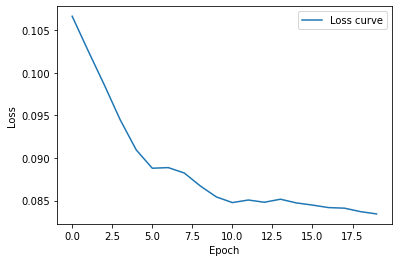

In [104]:
if load_existing:
    auto_encoder = AutoEncoder.load("model.autoencoder")
else:
    auto_encoder = AutoEncoder(
        train_size=0.99,
        device=device,
        latent_size=latent_size,
        lr=0.001
    )
    auto_encoder.train(20, batch=batch_size, plot_stats=True)
    auto_encoder.save("model")

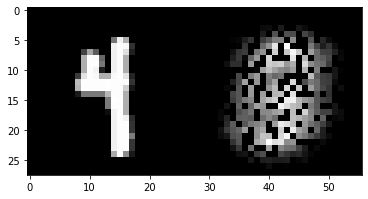

In [105]:
I = 1
sample = auto_encoder.get_image(I)
prediction = auto_encoder.predict(sample)

plt.imshow(np.hstack([sample,prediction]), cmap="gray")

loss=0.05932768, accuracy=0.8541: 100%|██████████| 500/500 [02:12<00:00,  3.77it/s]


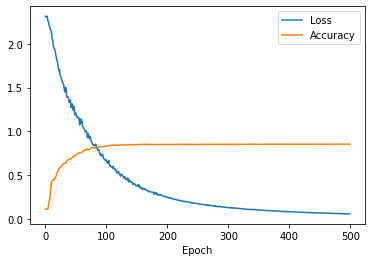

In [85]:
if load_existing:
    classifier = Classifier.load("model.classifier")
else:
    classifier = Classifier(
        train_size=0.01,
        device=device,
        latent_size=latent_size,
        lr=0.001
    )
    classifier.train(
        epochs=epochs, 
        batch=batch_size, 
        plot_stats=True, 
        optimize_encoder=True
        )
    classifier.save("model")

In [ ]:
I = 477
sample = classifier.get_image(I)
prediction = classifier.predict(sample)

plt.imshow(sample, cmap="gray", label="dsa")
print(f"{prediction=}")

loss=0.07467821, accuracy=0.8633: 100%|██████████| 500/500 [00:06<00:00, 76.74it/s]


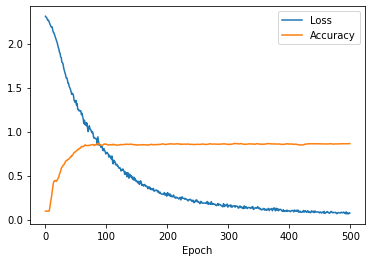

In [106]:
if load_existing:
    tuned_classifier = Classifier.load("pretrained.classifier")
else:
    tuned_classifier = auto_encoder.to_classifier(train_size=0.01)
    tuned_classifier.train(
        epochs=epochs,
        batch=batch_size,
        plot_stats=True,
        optimize_encoder=True
    )
    tuned_classifier.save("pretrained")

prediction=2


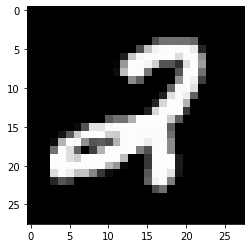

In [100]:
I = 475
sample = tuned_classifier.get_image(I)
prediction = tuned_classifier.predict(sample)

plt.imshow(sample, cmap="gray", label="dsa")
print(f"{prediction=}")